In [62]:
! pip install country_converter --upgrade

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import country_converter as coco

In [64]:
#Load the dataset
data =pd.read_csv('cost_of_living.csv')

In [65]:
data

,Countries,"Cost of living, 2017",Global rank,Available data
0,Bermuda,225.86,1,2017 - 2017
1,Iceland,209.10,2,2017 - 2017
2,Switzerland,197.89,3,2017 - 2017
3,Norway,186.52,4,2017 - 2017
4,Denmark,171.78,5,2017 - 2017
...,...,...,...,...
162,Azerbaijan,40.56,163,2017 - 2017
163,Kyrgyzstan,40.38,164,2017 - 2017
164,Sudan,38.29,165,2017 - 2017
165,Ukraine,37.76,166,2017 - 2017


In [66]:
data.head()

,Countries,"Cost of living, 2017",Global rank,Available data
0,Bermuda,225.86,1,2017 - 2017
1,Iceland,209.10,2,2017 - 2017
2,Switzerland,197.89,3,2017 - 2017
3,Norway,186.52,4,2017 - 2017
4,Denmark,171.78,5,2017 - 2017


In [67]:
data.tail()

,Countries,"Cost of living, 2017",Global rank,Available data
162,Azerbaijan,40.56,163,2017 - 2017
163,Kyrgyzstan,40.38,164,2017 - 2017
164,Sudan,38.29,165,2017 - 2017
165,Ukraine,37.76,166,2017 - 2017
166,Egypt,27.37,167,2017 - 2017


In [48]:
data.shape

(167, 4)

In [49]:
data.dtypes

Countries                object
Cost of living, 2017    float64
Global rank               int64
Available data           object
dtype: object

In [50]:
data.isnull().sum()

Countries               0
Cost of living, 2017    0
Global rank             0
Available data          0
dtype: int64

In [68]:
# Replace the values in the "Available data" column with "2017"
data['Available data'] = data['Available data'].str.replace(r'\d{4} - \d{4}', '2017')

# Check the resulting DataFrame
#print(data.head())

C:\Users\Akinmegs\AppData\Local\Temp\ipykernel_7724\1964999920.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Available data'] = data['Available data'].str.replace(r'\d{4} - \d{4}', '2017')


In [69]:
data

,Countries,"Cost of living, 2017",Global rank,Available data
0,Bermuda,225.86,1,2017
1,Iceland,209.10,2,2017
2,Switzerland,197.89,3,2017
3,Norway,186.52,4,2017
4,Denmark,171.78,5,2017
...,...,...,...,...
162,Azerbaijan,40.56,163,2017
163,Kyrgyzstan,40.38,164,2017
164,Sudan,38.29,165,2017
165,Ukraine,37.76,166,2017


In [19]:
# Drop the "Cost of living, 2017" column
#data = data.drop('Cost of living, 2017', axis=1)

In [14]:
data.head()

,Countries,"Cost of living, 2017",Global rank,Available data
0,Bermuda,225.86,1,2017
1,Iceland,209.10,2,2017
2,Switzerland,197.89,3,2017
3,Norway,186.52,4,2017
4,Denmark,171.78,5,2017


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
"Cost of living, 2017",167.0,82.922216,38.385231,27.37,55.035,70.08,102.59,225.86
Global rank,167.0,84.000000,48.352870,1.00,42.500,84.00,125.50,167.00


In [53]:
data.head()

,Countries,"Cost of living, 2017",Global rank,Available data
0,Bermuda,225.86,1,2017
1,Iceland,209.10,2,2017
2,Switzerland,197.89,3,2017
3,Norway,186.52,4,2017
4,Denmark,171.78,5,2017


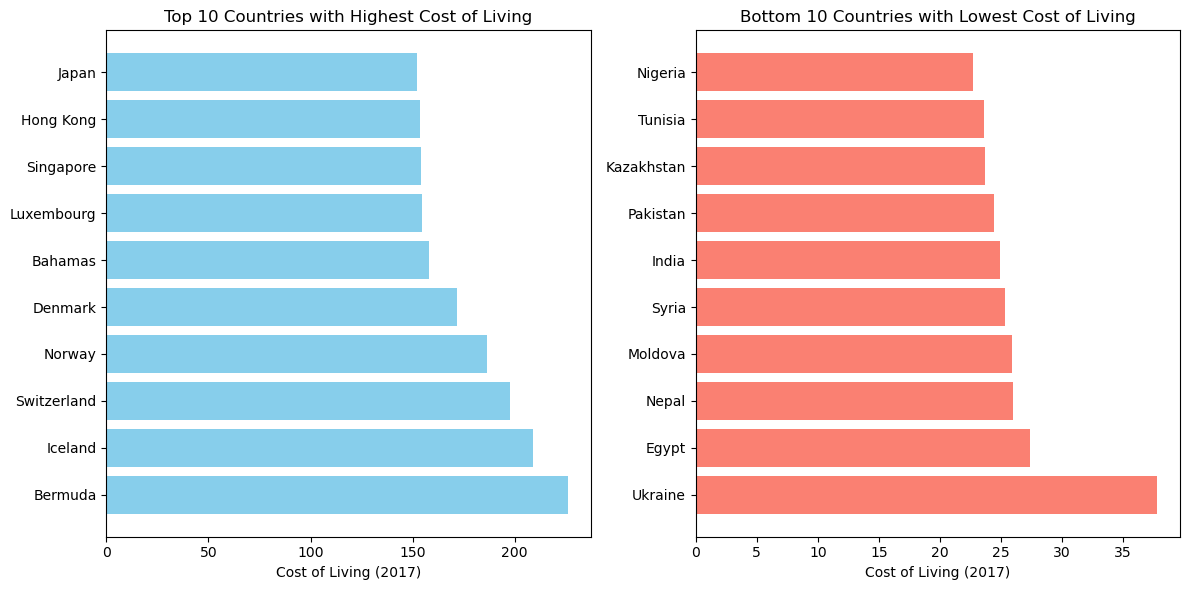

In [17]:
# Data for the top 10 countries
top_10_countries = ["Bermuda", "Iceland", "Switzerland", "Norway", "Denmark", "Bahamas", "Luxembourg", "Singapore", "Hong Kong", "Japan"]
top_10_cost_of_living = [225.86, 209.10, 197.89, 186.52, 171.78, 158.19, 154.69, 153.98, 153.74, 152.37]

# Data for the bottom 10 countries
bottom_10_countries = ["Ukraine", "Egypt", "Nepal", "Moldova", "Syria", "India", "Pakistan", "Kazakhstan", "Tunisia", "Nigeria"]
bottom_10_cost_of_living = [37.76, 27.37, 25.96, 25.89, 25.36, 24.93, 24.40, 23.71, 23.64, 22.69]

# Create subplots
plt.figure(figsize=(12, 6))

# Bar chart for the top 10 countries
plt.subplot(1, 2, 1)
plt.barh(top_10_countries, top_10_cost_of_living, color='skyblue')
plt.xlabel('Cost of Living (2017)')
plt.title('Top 10 Countries with Highest Cost of Living')

# Bar chart for the bottom 10 countries
plt.subplot(1, 2, 2)
plt.barh(bottom_10_countries, bottom_10_cost_of_living, color='salmon')
plt.xlabel('Cost of Living (2017)')
plt.title('Bottom 10 Countries with Lowest Cost of Living')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

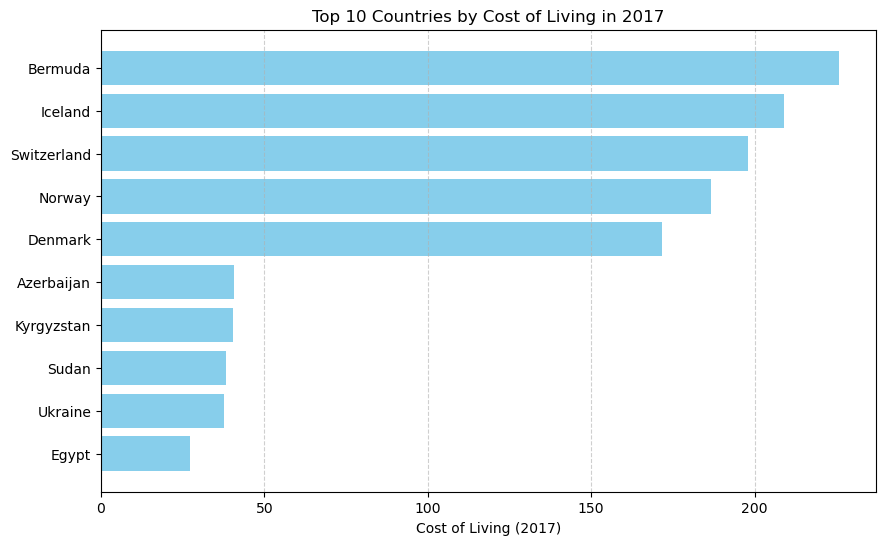

In [22]:
# Data
countries = ["Bermuda", "Iceland", "Switzerland", "Norway", "Denmark", "Azerbaijan", "Kyrgyzstan", "Sudan", "Ukraine", "Egypt"]
cost_of_living = [225.86, 209.10, 197.89, 186.52, 171.78, 40.56, 40.38, 38.29, 37.76, 27.37]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(countries, cost_of_living, color='skyblue')
plt.xlabel('Cost of Living (2017)')
plt.title('Top 10 Countries by Cost of Living in 2017')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest cost of living at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

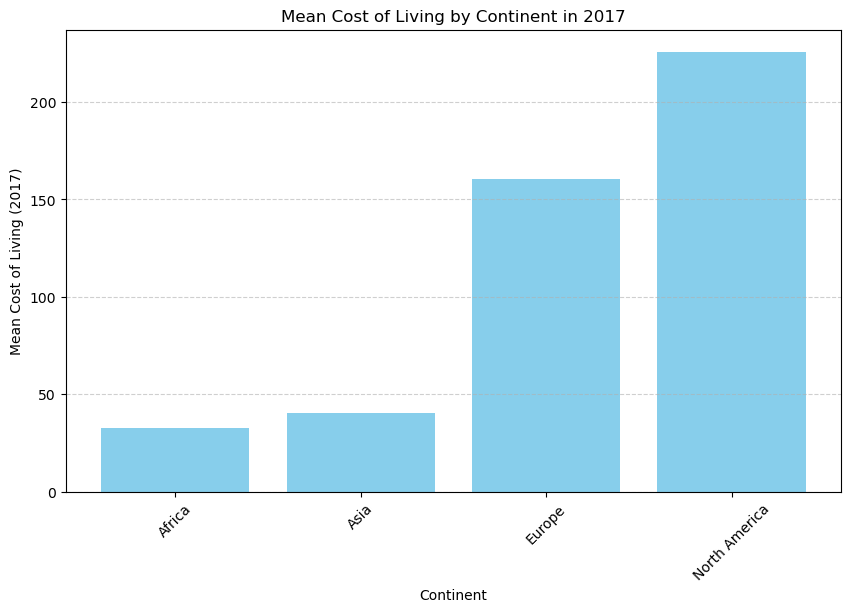

In [23]:
#Mean cost of Living by Continent in 2017
data = {
    "Country": ["Bermuda", "Iceland", "Switzerland", "Norway", "Denmark", "Azerbaijan", "Kyrgyzstan", "Sudan", "Ukraine", "Egypt"],
    "Cost_of_Living": [225.86, 209.10, 197.89, 186.52, 171.78, 40.56, 40.38, 38.29, 37.76, 27.37],
    "Continent": ["North America", "Europe", "Europe", "Europe", "Europe", "Asia", "Asia", "Africa", "Europe", "Africa"]
}

df = pd.DataFrame(data)

# Group by continent and calculate the mean cost of living
continent_mean_cost = df.groupby('Continent')['Cost_of_Living'].mean().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(continent_mean_cost['Continent'], continent_mean_cost['Cost_of_Living'], color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Mean Cost of Living (2017)')
plt.title('Mean Cost of Living by Continent in 2017')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

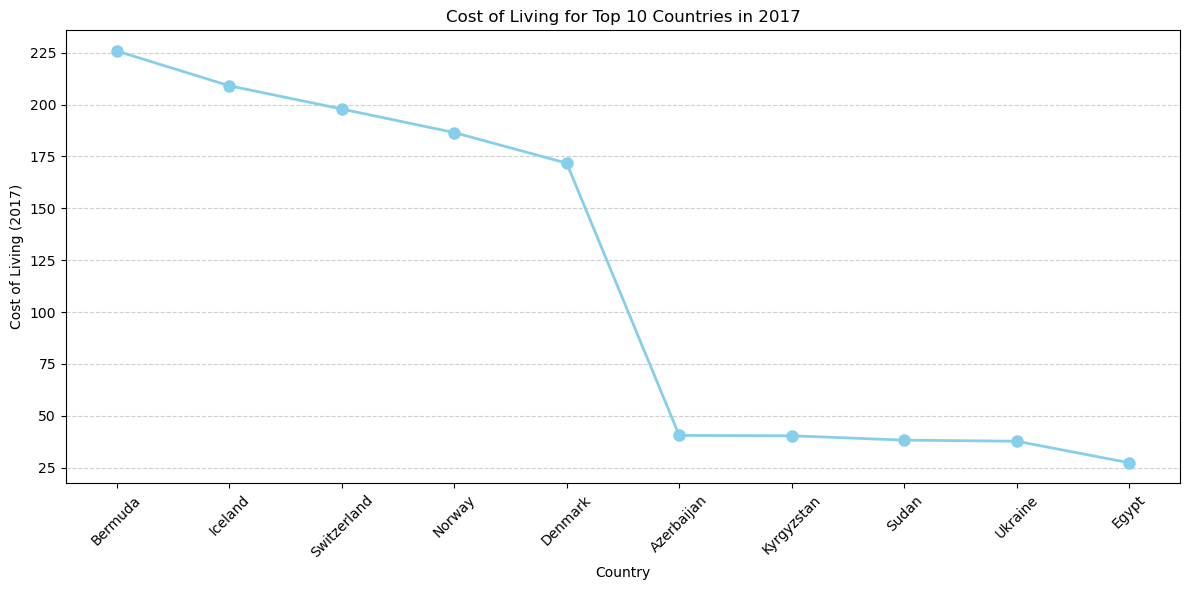

In [24]:
# Data
countries = ["Bermuda", "Iceland", "Switzerland", "Norway", "Denmark", "Azerbaijan", "Kyrgyzstan", "Sudan", "Ukraine", "Egypt"]
cost_of_living = [225.86, 209.10, 197.89, 186.52, 171.78, 40.56, 40.38, 38.29, 37.76, 27.37]

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(countries, cost_of_living, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Country')
plt.ylabel('Cost of Living (2017)')
plt.title('Cost of Living for Top 10 Countries in 2017')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

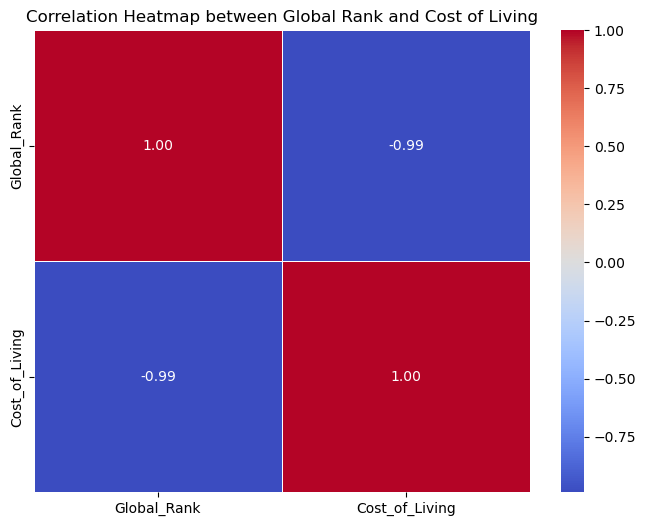

In [39]:
#HaetMap
# Sample data (replace with your actual dataset)
data = {
    "Country": ["Bermuda", "Iceland", "Switzerland", "Norway", "Denmark", "Azerbaijan", "Kyrgyzstan", "Sudan", "Ukraine", "Egypt"],
    "Cost_of_Living": [225.86, 209.10, 197.89, 186.52, 171.78, 40.56, 40.38, 38.29, 37.76, 27.37],
    "Global_Rank": [1, 2, 3, 4, 5, 163, 164, 165, 166, 167]
}

df = pd.DataFrame(data)

# Create a heatmap
plt.figure(figsize=(8, 6))
heatmap_data = df[['Global_Rank', 'Cost_of_Living']].corr()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap between Global Rank and Cost of Living')
plt.show()

In [72]:
# Split the dataset into features (X) and the target variable (y)
from sklearn.model_selection import train_test_split
X = data.drop("Cost of living, 2017", axis=1)  # Features (excluding the target variable)
y = data["Cost of living, 2017"]  # Target variable (Cost of living in 2017)

In [73]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (133, 3)
X_test shape: (34, 3)
y_train shape: (133,)
y_test shape: (34,)


# Feature Selection:

In [74]:
##Correlation Analysis: Calculate the correlation between each feature and the target variable. 
##Features with high absolute correlation values are more likely to be relevant.

# Calculate correlation with the target variable
correlations = data.corr()
correlation_with_target = correlations["Cost of living, 2017"].abs()

# Sort features by correlation value
relevant_features = correlation_with_target.sort_values(ascending=False)
print(relevant_features)

Cost of living, 2017    1.000000
Global rank             0.911331
Name: Cost of living, 2017, dtype: float64


C:\Users\Akinmegs\AppData\Local\Temp\ipykernel_7724\2438937803.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


In [76]:
from sklearn.feature_selection import SelectKBest, f_regression


# Define features (independent variable) and target (dependent variable)
X = data[['Global rank']]  # Feature: Global rank
y = data['Cost of living, 2017']  # Target: Cost of living in 2017

# Initialize SelectKBest with f_regression scoring function
k_best = SelectKBest(score_func=f_regression, k='all')  # You can specify 'k' as the number of top features to select

# Fit SelectKBest to your data
k_best.fit(X, y)

# Get the scores and p-values for each feature
feature_scores = k_best.scores_
p_values = k_best.pvalues_

# Create a DataFrame to display the scores and p-values
feature_selection_result = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores, 'P-value': p_values})

# Display the results
print(feature_selection_result)

       Feature       Score       P-value
0  Global rank  808.592197  1.712579e-65


# MODEL SELECTION:

# Linear Regression:

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = data[['Global rank']]
y = data['Cost of living, 2017']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 134.37661071482012
Mean Absolute Error: 10.447297692535377


Mean Squared Error (MSE): MSE measures the average of the squared differences between predicted values and actual values. In your case, an MSE of approximately 134.38 means that, on average, the squared difference between the predicted and actual cost of living values is 134.38. Lower MSE values indicate better model performance.

Mean Absolute Error (MAE): MAE measures the average of the absolute differences between predicted values and actual values. An MAE of approximately 10.45 means that, on average, the absolute difference between the predicted and actual cost of living values is 10.45.

In [78]:
#Decison Tree Regressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = data[['Global rank']]
y = data['Cost of living, 2017']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a decision tree model
model = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.887417647058827
Mean Absolute Error: 0.9035294117647074


Mean Squared Error (MSE): An MSE of approximately 1.89 indicates that, on average, the squared difference between the predicted and actual cost of living values is 1.89. This suggests that your decision tree model is providing relatively accurate predictions.

Mean Absolute Error (MAE): An MAE of approximately 0.90 means that, on average, the absolute difference between the predicted and actual cost of living values is 0.90. MAE represents a more interpretable measure of prediction accuracy in the same units as the target variable.

These results indicate that your decision tree model is performing well in predicting the cost of living based on the "Global rank" feature. The low values of MSE and MAE suggest that the model is making accurate predictions with small errors.

In [79]:
#Random Forests:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = data[['Global rank']]
y = data['Cost of living, 2017']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.0438168070588503
Mean Absolute Error: 0.658794117647071


In [80]:
##Support Vector Machines (SVMs):

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = data[['Global rank']]
y = data['Cost of living, 2017']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an SVR model
model = SVR(kernel='linear')  # You can choose different kernel functions (linear, polynomial, etc.)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 202.75872188107022
Mean Absolute Error: 9.854607843137732


In [81]:
##Neural Networks (Deep Learning):
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = data[['Global rank']]
y = data['Cost of living, 2017']

# Normalize the data (optional but can help with training)
# X = (X - X.mean()) / X.std()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network model
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=1))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 8181.2104
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 7466.4185
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 6879.8442
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 6391.1577
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 6071.9355
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 5824.9741
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 5637.9150
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 5510.5356
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 5415.9761
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 5363.9102
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 5340.2744
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 5331.2817
Epoch 13/100
5/5 [=======

Mean Squared Error (MSE): An MSE of approximately 5163.56 indicates that, on average, the squared difference between the predicted and actual cost of living values is 5163.56. This suggests that the neural network model's predictions have relatively high errors.

Mean Absolute Error (MAE): An MAE of approximately 55.21 means that, on average, the absolute difference between the predicted and actual cost of living values is 55.21. MAE represents a more interpretable measure of prediction accuracy in the same units as the target variable.

The high values of MSE and MAE suggest that the neural network model, as currently configured, may not be performing well on this specific dataset. There are several considerations to improve the model's performance:

# Hyperparameter Tuning for Decision Trees:

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Load your dataset and split it into X and y as shown before
#data = pd.read_csv('your_data.csv')
X = data[['Global rank']]
y = data['Cost of living, 2017']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree with the best hyperparameters on the entire training dataset
best_dt_regressor = DecisionTreeRegressor(**best_params, random_state=42)
best_dt_regressor.fit(X_train, y_train)

# Evaluate the model on the test dataset
y_pred = best_dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error: 1.887417647058827
Mean Absolute Error: 0.9035294117647074


The best hyperparameters for the Decision Tree model, as determined by the grid search, are as follows:

max_depth: None
min_samples_leaf: 1
min_samples_split: 2

Interpretations of the evaluation metrics for the Decision Tree model are as follows:

Mean Squared Error (MSE): 
The MSE is approximately 1.89. This value represents the average of the squared differences between the predicted and actual cost of living values. In the context of this predictive model, an MSE of 1.89 indicates that, on average, the squared prediction errors are 1.89 units.

Mean Absolute Error (MAE): 
The MAE is approximately 0.90. This value represents the average of the absolute differences between the predicted and actual cost of living values. In this model, an MAE of 0.90 means that, on average, the absolute prediction errors are 0.90 units.

Interpretation:

The Decision Tree model, with the selected hyperparameters, performs reasonably well in predicting the cost of living based on the "Global rank" feature.

The relatively low MSE and MAE values suggest that the model's predictions are generally close to the actual cost of living values.

The choice of max_depth=None allows the Decision Tree to grow until it achieves pure leaves, which might capture complex relationships in the data.

min_samples_leaf=1 indicates that each leaf node should contain at least one sample, which can lead to fine-grained splits in the tree.

min_samples_split=2 specifies that a node can be split if it has at least two samples, meaning that the tree can explore different potential splits more freely.

Overall, this Decision Tree model with hyperparameters performed well for the task, capturing the relationship between "Global rank" and the cost of living with relatively low prediction errors.


# Hyperparameter Tuning for Random Forests:

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X = data[['Global rank']]
y = data['Cost of living, 2017']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest with the best hyperparameters on the entire training dataset
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)
best_rf_regressor.fit(X_train, y_train)

# Evaluate the model on the test dataset
y_pred = best_rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

C:\Users\Akinmegs\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


C:\Users\Akinmegs\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean Squared Error: 1.0364934340525191
Mean Absolute Error: 0.6436862745098312


# Geospatial Maps:

In [58]:
!pip install folium

In [59]:
import folium
import pandas as pd

# Sample data (replace with your actual dataset)
data = {
    "Country": ["Bermuda", "Iceland", "Switzerland", "Norway", "Denmark", "Azerbaijan", "Kyrgyzstan", "Sudan", "Ukraine", "Egypt"],
    "Cost_of_Living": [225.86, 209.10, 197.89, 186.52, 171.78, 40.56, 40.38, 38.29, 37.76, 27.37],
    "Latitude": [32.3078, 64.9631, 46.8182, 60.4720, 56.2639, 40.1431, 41.2044, 12.8628, 48.3794, 26.8206],
    "Longitude": [-64.7505, -19.0208, 8.2275, 8.4689, 9.5018, 47.5769, 74.7661, 30.2176, 31.1656, 30.8025]
}

df = pd.DataFrame(data)

# Create a world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Define color categories for cost of living levels
color_categories = {
    "High": "green",
    "Moderate": "orange",
    "Low": "red"
}

# Function to categorize cost of living into levels
def categorize_cost_of_living(cost):
    if cost > 200:
        return "High"
    elif cost > 100:
        return "Moderate"
    else:
        return "Low"

# Add markers to the map
for index, row in df.iterrows():
    cost = row["Cost_of_Living"]
    category = categorize_cost_of_living(cost)
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=6,
        color=color_categories[category],
        fill=True,
        fill_color=color_categories[category],
        fill_opacity=0.7,
        popup=f"{row['Country']}: Cost of Living {cost}",
    ).add_to(world_map)

# Display the map
world_map.save("cost_of_living_map.html")